<a href="https://colab.research.google.com/github/sokrypton/laxy/blob/main/laxy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -qnc https://raw.githubusercontent.com/sokrypton/laxy/main/laxy.py

In [2]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
from laxy import *

# LINEAR REGRESSION

In [3]:
x = jnp.arange(10)
y = x*2.0 + 3.0

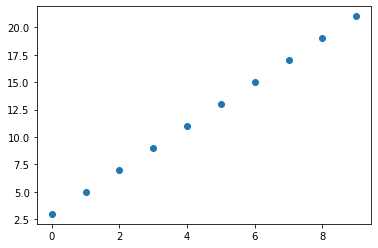

In [4]:
plt.scatter(x,y)

In [5]:
def model(params, inputs):
  y = inputs["x"] * params["m"] + params["b"]
  loss = jnp.square(inputs["y"] - y).sum()
  return loss

In [6]:
inputs = {"x":x, "y":y}
params = {"m":1.0,"b":0.0}

In [7]:
opt = OPT(model, params)

In [8]:
losses = opt.fit(inputs, steps=10000)

1000 97.57238
2000 11.032278
3000 6.2381396
4000 4.2776027
5000 2.339671
6000 0.90313137
7000 0.2005393
8000 0.017665602
9000 0.0003205021
10000 4.0911215e-07


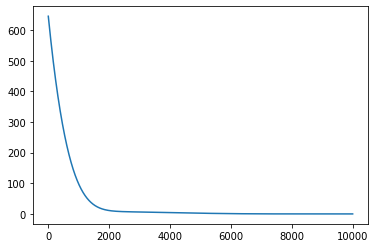

In [9]:
plt.plot(losses)

In [10]:
opt.get_params()

{'b': DeviceArray(2.9996269, dtype=float32),
 'm': DeviceArray(2.0000622, dtype=float32)}

In [11]:
opt.get_loss(inputs)

DeviceArray(4.0625906e-07, dtype=float32)

# build a NN using custom layers from laxy
custom layers include: MRF, Conv1D, Conv2D, GRU, Dense

In [12]:
params = {"D0": Dense()(in_dims=10, out_dims=5),
          "D1": Dense()(in_dims=5, out_dims=1),
          "a":1.0}

In [13]:
def model(params, inputs):
  I = inputs["x"]
  D = Dense(params["D0"])(I)
  D = jax.nn.elu(D)
  O = Dense(params["D1"])(D) * params["a"]
  loss = jnp.square(O - inputs["y"]).sum()
  return loss

In [14]:
opt = OPT(model, params)

In [15]:
inputs = {"x":np.random.normal(size=(100,10)),
          "y":np.random.normal(size=(100,1))}

In [16]:
%%time
losses = opt.fit(inputs, steps=1000)

100 104.57703
200 86.07533
300 79.20316
400 75.970116
500 73.85148
600 71.89831
700 69.51507
800 66.25847
900 62.849216
1000 60.02617
CPU times: user 1.62 s, sys: 40.7 ms, total: 1.66 s
Wall time: 1.65 s


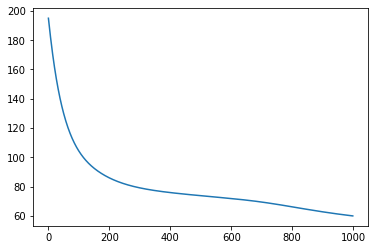

In [17]:
plt.plot(losses)

#STAX

In [18]:
from jax.experimental import stax

In [19]:
stax_layers = stax.serial(stax.Dense(5),
                          stax.Elu,
                          stax.Dense(1))
nn_params, nn_layers = STAX(stax_layers, (None,10))

In [20]:
params = {"nn":nn_params,
          "a":1.0}

In [21]:
def model(params, inputs):
  I = inputs["x"]
  O = nn_layers(params["nn"], I) * params["a"]
  loss = jnp.square(O - inputs["y"]).sum()
  return loss

In [22]:
opt = OPT(model, params)

In [23]:
inputs = {"x":np.random.normal(size=(100,10)),
          "y":np.random.normal(size=(100,1))}

In [24]:
losses = opt.fit(inputs, steps=1000)

100 190.77335
200 129.54709
300 107.879555
400 99.47898
500 95.3416
600 92.221
700 89.29933
800 86.40739
900 83.499725
1000 80.792206


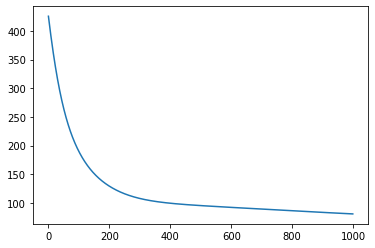

In [25]:
plt.plot(losses)